## ** CIFAR-10 Classification via CNNs**

Her we will follow the below steps:

```
1. First load and normalize the CIFAR-10 dataset.
2. Next, define your CNN model, loss function and optimizer.
3. Finally, once you have defined everything correctly, you can begin training your model.
4. For evaluation, you will need to test the model on test data and report your test accuracy.
5. Plot the model train and validation: loss and accuracy curves
```


In [1]:
# Import required libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [4]:
def print_final_accuracy(model, testloader):
    total = 0
    correct = 0
    # we need to send the data to the same device as the data, so determine the
    # model's device
    device = next(model.parameters()).device
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    assert total == 10000, "Incorrect testloader used. There should be 10,000 test images"
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256 * 4 * 4, 812)
        self.fc2 = nn.Linear(812, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


100%|██████████| 170498071/170498071 [00:01<00:00, 90905602.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
beginning training!
epoch = 1
Train Accuracy:  40.62
Test Accuracy:  41.55
epoch = 2
Train Accuracy:  55.988
Test Accuracy:  54.5
epoch = 3
Train Accuracy:  66.758
Test Accuracy:  64.58
epoch = 4
Train Accuracy:  73.81
Test Accuracy:  70.46
epoch = 5
Train Accuracy:  76.432
Test Accuracy:  71.5
epoch = 6
Train Accuracy:  82.216
Test Accuracy:  75.51
epoch = 7
Train Accuracy:  84.816
Test Accuracy:  76.62
epoch = 8
Train Accuracy:  87.062
Test Accuracy:  76.58
epoch = 9
Train Accuracy:  87.592
Test Accuracy:  76.28
epoch = 10
Train Accuracy:  89.714
Test Accuracy:  77.08
epoch = 11
Train Accuracy:  91.468
Test Accuracy:  77.32
epoch = 12
Train Accuracy:  93.086
Test Accuracy:  77.74
epoch = 13
Train Accuracy:  92.52
Test Accuracy:  77.18
epoch = 14
Train Accuracy:  94.018
Test Accuracy:  77.34
epoch = 15
Train Accuracy:  94.692
Test Accuracy:  77.68
Accuracy of the network on the 10000 test images: 

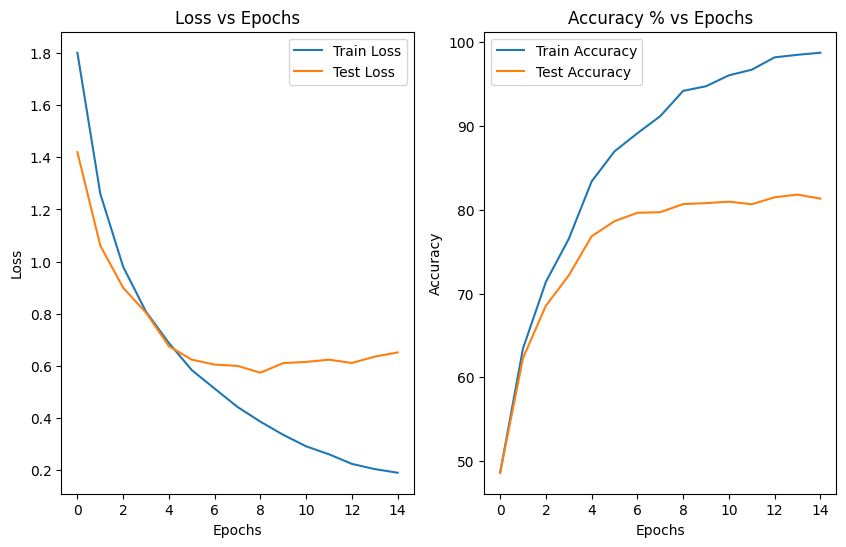

In [6]:

def calculate_accuracy(model, testloader):
    total = 0
    correct = 0

    device = next(model.parameters()).device
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct /total



def main():
    # TODO: load and transform dataset

    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    batch_size = 64

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # TODO: Define your optimizer and criterion.
    model = CNN()
    model.to(device)
    criterion = nn.CrossEntropyLoss()   # TODO
    learning_rate = 0.01
    weight_decay = 0.001
    mnm = 0.9

    optimizer =  optim.SGD(model.parameters(), lr=learning_rate, momentum=mnm) #optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    num_epoch =   15

    train_loss_list = []
    test_loss_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    # TODO: store loss over epochs for plot

    print("beginning training!")
    for epoch in range(num_epoch):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs and labels; send to device (if using GPU)

            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 500 == 499:
                print("epoch =", epoch+1)
                print("Train Accuracy: ", calculate_accuracy(model, trainloader))
                print("Test Accuracy: ",calculate_accuracy(model, testloader))

        train_loss_list.append(running_loss / len(trainloader))

        model.eval()

        train_accuracy = calculate_accuracy(model, trainloader)
        train_accuracy_list.append(train_accuracy)


        test_loss = 0.0
        for i, data in enumerate(testloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

        test_loss_list.append(test_loss / len(testloader))

        # Calculate test accuracy
        test_accuracy = calculate_accuracy(model, testloader)
        test_accuracy_list.append(test_accuracy)
        model.train()

    # print final accuracy
    print_final_accuracy(model, testloader)
    print("Hyperparameters used are as below:")
    #print("Adam optimizer was used for optimization")
    print("SGD optimizer was used for optimization")
    print("Learning rate =", learning_rate)
    #print("Weight Decay =", weight_decay)
    print("Momentum =", mnm)
    print("Number of Epochs =", num_epoch)
    print("Batch Size =",  batch_size)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(test_loss_list, label='Test Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the training and test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_list, label='Train Accuracy')
    plt.plot(test_accuracy_list, label='Test Accuracy')
    plt.title('Accuracy % vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    PATH = PATH = "model_state_dict.pkl"

    torch.save(model.state_dict(), PATH)

if __name__ == "__main__":
  main()


In addressing the given problem, I explored the effectiveness of two optimization algorithms: the Adam Optimizer and Stochastic Gradient Descent (SGD). After a comparative analysis, I opted for SGD based on its performance in the context of my computations.

Initially, I set the learning rate for SGD at 0.001. However, this configuration did not yield satisfactory training outcomes. Consequently, I adjusted the learning rate to 0.01, which significantly improved the model's performance.

Furthermore, I investigated the impact of varying the number of convolutional layers within my Convolutional Neural Network (CNN). Through experimentation with two, three, and four convolutional layers, I observed a notable enhancement in test accuracy as the number of layers increased. Ultimately, I selected a configuration with four convolutional layers due to its superior accuracy on the test data.

To mitigate overfitting and enhance the generalization capability of the model, I incorporated dropout regularization in both the convolutional and fully connected (FC) layers of the network. This strategy proved effective in stabilizing the training process and improving the model's overall performance.
